In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s4e12/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e12/test.csv')

In [4]:
len(train), len(test)

(1200000, 800000)

In [5]:
df = pd.concat([train, test], axis=0)

In [6]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 799999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    2000000 non-null  int64  
 1   Age                   1968806 non-null  float64
 2   Gender                2000000 non-null  object 
 3   Annual Income         1925191 non-null  float64
 4   Marital Status        1969135 non-null  object 
 5   Number of Dependents  1817198 non-null  float64
 6   Education Level       2000000 non-null  object 
 7   Occupation            1402800 non-null  object 
 8   Health Score          1876475 non-null  float64
 9   Location              2000000 non-null  object 
 10  Policy Type           2000000 non-null  object 
 11  Previous Claims       1393169 non-null  float64
 12  Vehicle Age           1999991 non-null  float64
 13  Credit Score          1770667 non-null  float64
 14  Insurance Duration    1999997 non-null  

In [7]:
del df['id']
del df['Policy Start Date']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 799999
Data columns (total 19 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Age                   float64
 1   Gender                object 
 2   Annual Income         float64
 3   Marital Status        object 
 4   Number of Dependents  float64
 5   Education Level       object 
 6   Occupation            object 
 7   Health Score          float64
 8   Location              object 
 9   Policy Type           object 
 10  Previous Claims       float64
 11  Vehicle Age           float64
 12  Credit Score          float64
 13  Insurance Duration    float64
 14  Customer Feedback     object 
 15  Smoking Status        object 
 16  Exercise Frequency    object 
 17  Property Type         object 
 18  Premium Amount        float64
dtypes: float64(9), object(10)
memory usage: 305.2+ MB


In [9]:
# annual income & premium amount has a long tail -> log transformer
from sklearn.preprocessing import FunctionTransformer
import numpy as np

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
df['Annual Income'] = log_transformer.fit_transform(df[['Annual Income']])
df['Premium Amount'] = log_transformer.fit_transform(df[['Premium Amount']])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_function_transformer.py:190: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_function_transformer.py:190: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


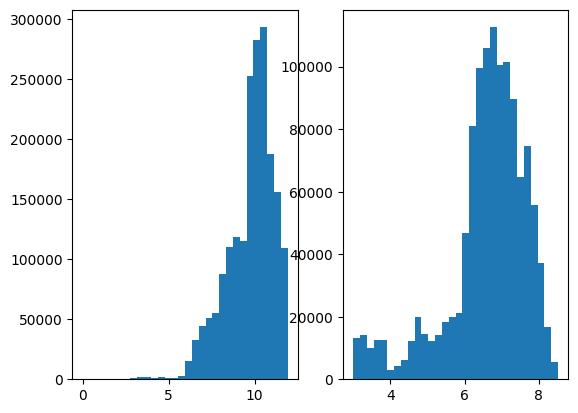

In [10]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.hist(df['Annual Income'], bins=30, label="Annual Income")
# df['Annual Income'].hist(bins=50, figsize=(15,10))

plt.subplot(1, 2, 2)
plt.hist(df['Premium Amount'], bins=30, label="Premium Amount")

plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 799999
Data columns (total 19 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Age                   float64
 1   Gender                object 
 2   Annual Income         float64
 3   Marital Status        object 
 4   Number of Dependents  float64
 5   Education Level       object 
 6   Occupation            object 
 7   Health Score          float64
 8   Location              object 
 9   Policy Type           object 
 10  Previous Claims       float64
 11  Vehicle Age           float64
 12  Credit Score          float64
 13  Insurance Duration    float64
 14  Customer Feedback     object 
 15  Smoking Status        object 
 16  Exercise Frequency    object 
 17  Property Type         object 
 18  Premium Amount        float64
dtypes: float64(9), object(10)
memory usage: 305.2+ MB


In [12]:
# fill nan by mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])

In [14]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 799999
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1968806 non-null  float64
 1   Gender                2000000 non-null  object 
 2   Annual Income         1925191 non-null  float64
 3   Marital Status        2000000 non-null  object 
 4   Number of Dependents  1817198 non-null  float64
 5   Education Level       2000000 non-null  object 
 6   Occupation            2000000 non-null  object 
 7   Health Score          1876475 non-null  float64
 8   Location              2000000 non-null  object 
 9   Policy Type           2000000 non-null  object 
 10  Previous Claims       1393169 non-null  float64
 11  Vehicle Age           1999991 non-null  float64
 12  Credit Score          1770667 non-null  float64
 13  Insurance Duration    1999997 non-null  float64
 14  Customer Feedback     2000000 non-null  

In [15]:
# fill nan by median
for col in df.columns:
    if df[col].dtype == 'float64' and col != 'Premium Amount':
        median = df[col].median()
        df[col] = df[col].fillna(median)

In [16]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 799999
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   2000000 non-null  float64
 1   Gender                2000000 non-null  object 
 2   Annual Income         2000000 non-null  float64
 3   Marital Status        2000000 non-null  object 
 4   Number of Dependents  2000000 non-null  float64
 5   Education Level       2000000 non-null  object 
 6   Occupation            2000000 non-null  object 
 7   Health Score          2000000 non-null  float64
 8   Location              2000000 non-null  object 
 9   Policy Type           2000000 non-null  object 
 10  Previous Claims       2000000 non-null  float64
 11  Vehicle Age           2000000 non-null  float64
 12  Credit Score          2000000 non-null  float64
 13  Insurance Duration    2000000 non-null  float64
 14  Customer Feedback     2000000 non-null  

In [17]:
df_final = pd.get_dummies(df, dtype='int')

In [18]:
len(df_final.columns)

39

In [19]:
train = df_final.iloc[:len(train)]
test = df_final.iloc[len(train):]

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200000 entries, 0 to 1199999
Data columns (total 39 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Age                          1200000 non-null  float64
 1   Annual Income                1200000 non-null  float64
 2   Number of Dependents         1200000 non-null  float64
 3   Health Score                 1200000 non-null  float64
 4   Previous Claims              1200000 non-null  float64
 5   Vehicle Age                  1200000 non-null  float64
 6   Credit Score                 1200000 non-null  float64
 7   Insurance Duration           1200000 non-null  float64
 8   Premium Amount               1200000 non-null  float64
 9   Gender_Female                1200000 non-null  int64  
 10  Gender_Male                  1200000 non-null  int64  
 11  Marital Status_Divorced      1200000 non-null  int64  
 12  Marital Status_Married       1200000 non-null  

In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800000 entries, 0 to 799999
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Age                          800000 non-null  float64
 1   Annual Income                800000 non-null  float64
 2   Number of Dependents         800000 non-null  float64
 3   Health Score                 800000 non-null  float64
 4   Previous Claims              800000 non-null  float64
 5   Vehicle Age                  800000 non-null  float64
 6   Credit Score                 800000 non-null  float64
 7   Insurance Duration           800000 non-null  float64
 8   Premium Amount               0 non-null       float64
 9   Gender_Female                800000 non-null  int64  
 10  Gender_Male                  800000 non-null  int64  
 11  Marital Status_Divorced      800000 non-null  int64  
 12  Marital Status_Married       800000 non-null  int64  
 13  Mari

In [22]:
train.to_csv('02_train.csv', index=False)
test.to_csv('02_test.csv', index=False)